# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPooling2D, Flatten, Dense,BatchNormalization,GlobalAveragePooling2D,Conv2D,Dropout,Flatten,Rescaling,Input
from keras import regularizers
from keras.callbacks import EarlyStopping,ModelCheckpoint

import os
import random
import cv2

2024-07-24 11:27:34.320101: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 11:27:34.320205: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 11:27:34.443307: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Making dataframes for train, validation and test data

In [2]:
data_path = r"/kaggle/input/mango-leaf-disease-dataset"
img_size = (224,224)
batch_size = 32
mode = "rgb"
epochs = 25

In [3]:
def df_maker(path):
    file_paths = []
    labels = []

    folds = os.listdir(path)
    for fold in folds:
        fold_path = os.path.join(path,fold)
        file_list = os.listdir(fold_path)
        for file in file_list:
            file_path = os.path.join(fold_path,file)
            file_paths.append(file_path)
            labels.append(fold)


    file_series = pd.Series(file_paths,name="file_paths")
    label_series = pd.Series(labels,name="labels")

    df = pd.concat([file_series,label_series],axis=1)
    return df

In [4]:
df = df_maker(data_path)

In [5]:
df

,file_paths,labels
0,/kaggle/input/mango-leaf-disease-dataset/Powde...,Powdery Mildew
1,/kaggle/input/mango-leaf-disease-dataset/Powde...,Powdery Mildew
2,/kaggle/input/mango-leaf-disease-dataset/Powde...,Powdery Mildew
3,/kaggle/input/mango-leaf-disease-dataset/Powde...,Powdery Mildew
4,/kaggle/input/mango-leaf-disease-dataset/Powde...,Powdery Mildew
...,...,...
3995,/kaggle/input/mango-leaf-disease-dataset/Die B...,Die Back
3996,/kaggle/input/mango-leaf-disease-dataset/Die B...,Die Back
3997,/kaggle/input/mango-leaf-disease-dataset/Die B...,Die Back
3998,/kaggle/input/mango-leaf-disease-dataset/Die B...,Die Back


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file_paths  4000 non-null   object
 1   labels      4000 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [7]:
train_df,test_df= train_test_split(df ,train_size= 0.75, shuffle= True, random_state= 7, stratify=df["labels"])

In [8]:
test_df,val_df= train_test_split(test_df ,train_size= 0.5, shuffle= True, random_state= 7, stratify=test_df["labels"])

In [9]:
train_df

,file_paths,labels
2370,/kaggle/input/mango-leaf-disease-dataset/Sooty...,Sooty Mould
1065,/kaggle/input/mango-leaf-disease-dataset/Anthr...,Anthracnose
334,/kaggle/input/mango-leaf-disease-dataset/Powde...,Powdery Mildew
899,/kaggle/input/mango-leaf-disease-dataset/Cutti...,Cutting Weevil
3907,/kaggle/input/mango-leaf-disease-dataset/Die B...,Die Back
...,...,...
2984,/kaggle/input/mango-leaf-disease-dataset/Gall ...,Gall Midge
2756,/kaggle/input/mango-leaf-disease-dataset/Gall ...,Gall Midge
3436,/kaggle/input/mango-leaf-disease-dataset/Healt...,Healthy
1884,/kaggle/input/mango-leaf-disease-dataset/Bacte...,Bacterial Canker


In [10]:
test_df

,file_paths,labels
3312,/kaggle/input/mango-leaf-disease-dataset/Healt...,Healthy
24,/kaggle/input/mango-leaf-disease-dataset/Powde...,Powdery Mildew
2167,/kaggle/input/mango-leaf-disease-dataset/Sooty...,Sooty Mould
1233,/kaggle/input/mango-leaf-disease-dataset/Anthr...,Anthracnose
2607,/kaggle/input/mango-leaf-disease-dataset/Gall ...,Gall Midge
...,...,...
3807,/kaggle/input/mango-leaf-disease-dataset/Die B...,Die Back
3878,/kaggle/input/mango-leaf-disease-dataset/Die B...,Die Back
3633,/kaggle/input/mango-leaf-disease-dataset/Die B...,Die Back
1792,/kaggle/input/mango-leaf-disease-dataset/Bacte...,Bacterial Canker


In [11]:
val_df

,file_paths,labels
2814,/kaggle/input/mango-leaf-disease-dataset/Gall ...,Gall Midge
3103,/kaggle/input/mango-leaf-disease-dataset/Healt...,Healthy
503,/kaggle/input/mango-leaf-disease-dataset/Cutti...,Cutting Weevil
3333,/kaggle/input/mango-leaf-disease-dataset/Healt...,Healthy
1043,/kaggle/input/mango-leaf-disease-dataset/Anthr...,Anthracnose
...,...,...
1054,/kaggle/input/mango-leaf-disease-dataset/Anthr...,Anthracnose
2831,/kaggle/input/mango-leaf-disease-dataset/Gall ...,Gall Midge
2743,/kaggle/input/mango-leaf-disease-dataset/Gall ...,Gall Midge
1189,/kaggle/input/mango-leaf-disease-dataset/Anthr...,Anthracnose


# Number of images in each class

In [12]:
df.labels.value_counts()

labels
Powdery Mildew      500
Cutting Weevil      500
Anthracnose         500
Bacterial Canker    500
Sooty Mould         500
Gall Midge          500
Healthy             500
Die Back            500
Name: count, dtype: int64

In [13]:
iplot(px.bar(
    data_frame = df.labels.value_counts().reset_index(),
    x="labels",
    y="count",
    title="Number of images for each class in train data",
    template="plotly_dark"
))

# Loading images from dataframes using ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

In [15]:
train_data = train_datagen.flow_from_dataframe(
    train_df,
    x_col = "file_paths",
    y_col = "labels",
    target_size=img_size,
    color_mode= mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
)
test_data = test_datagen.flow_from_dataframe(
    test_df,
    x_col = "file_paths",
    y_col = "labels",
    target_size=img_size,
    color_mode= mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
)
val_data = val_datagen.flow_from_dataframe(
    val_df,
    x_col = "file_paths",
    y_col = "labels",
    target_size=img_size,
    color_mode= mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
)

Found 3000 validated image filenames belonging to 8 classes.
Found 500 validated image filenames belonging to 8 classes.
Found 500 validated image filenames belonging to 8 classes.


# Showing sample images from the data

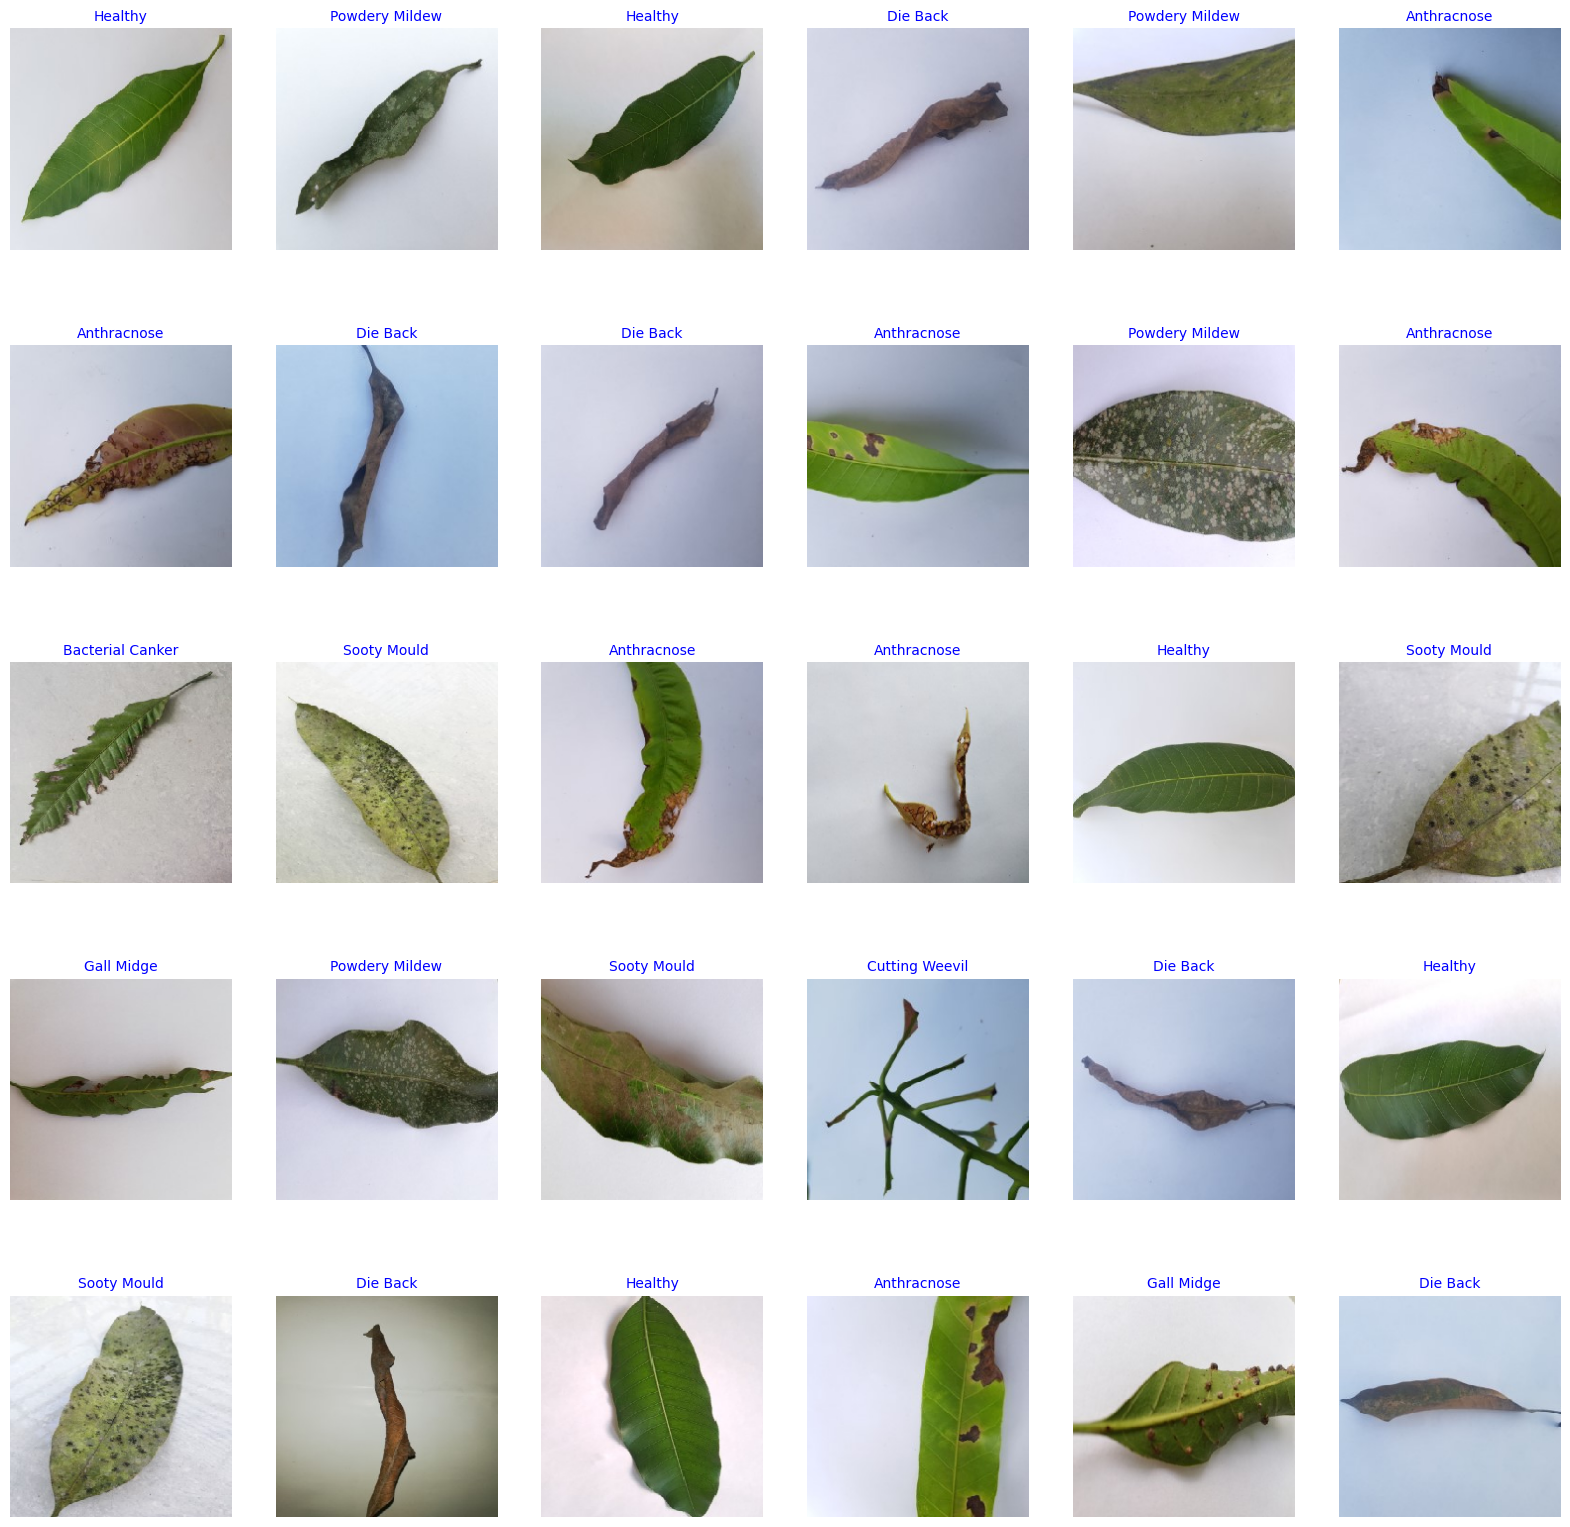

In [16]:
g_dict = train_data.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_data)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 24))

for i in range(30):
    plt.subplot(6, 6, i + 1)
    image = images[i]/255
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 10)
    plt.axis('off')

# 1st Model: EfficientNetB5

In [17]:
base_model_1  = tf.keras.applications.EfficientNetB5(weights = "imagenet", include_top = False, pooling = "max")

115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [18]:
base_model_1.trainable = False

efficientnet_model = Sequential([
    Input(shape = (224,224,3)),
    base_model_1,
    Dropout(0.2),
    
    BatchNormalization(),
    Dense(256, activation= 'relu',kernel_regularizer= regularizers.l2(0.016)),
    Dropout(0.2, seed = 7),
    Dense(256, activation= 'relu',kernel_regularizer= regularizers.l2(0.016)),
    Dropout(0.2, seed = 7),
    
    Dense(8, activation= 'softmax')
])


efficientnet_model.compile(optimizer = keras.optimizers.Adamax(learning_rate = 0.001), loss="categorical_crossentropy",metrics=["accuracy"])

In [19]:
efficientnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb5 (Functional)     │ (None, 2048)           │    28,513,527 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,114,111 (111.06 MB)

 Trainable params: 596,488 (2.28 MB)

 Non-trainable params: 28,517,623 (108.79 MB)

In [20]:
check_point = ModelCheckpoint('efficientNet_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping =EarlyStopping(monitor='val_accuracy',patience=10, restore_best_weights=True, mode='max')

## Training and evaluating EfficientNetB5 Model

In [21]:
history = efficientnet_model.fit(train_data,epochs = epochs, validation_data = val_data, callbacks = [check_point,early_stopping])

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:30:08 97s/step - accuracy: 0.1562 - loss: 13.8099

I0000 00:00:1721820584.279178      71 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


46/94 ━━━━━━━━━━━━━━━━━━━━ 1:27 2s/step - accuracy: 0.4613 - loss: 12.4239

W0000 00:00:1721820666.590397      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


94/94 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.5776 - loss: 11.7046 - val_accuracy: 0.8640 - val_loss: 8.7613
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.8595 - loss: 8.2100 - val_accuracy: 0.9480 - val_loss: 6.4252
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.9112 - loss: 6.1168 - val_accuracy: 0.9480 - val_loss: 4.8481
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.9224 - loss: 4.6135 - val_accuracy: 0.9700 - val_loss: 3.6370
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9285 - loss: 3.5179 - val_accuracy: 0.9760 - val_loss: 2.7408
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.9501 - loss: 2.6669 - val_accuracy: 0.9780 - val_loss: 2.0924
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9473 - loss: 2.0569 - val_accuracy: 0.9900 - val_loss: 1.6067
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.9509 - loss: 1.5989 - val_accuracy: 0.9840

In [22]:
efficientnet_model.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - accuracy: 0.9704 - loss: 0.6553


[0.660027265548706, 0.9739999771118164]

In [23]:
vals = pd.DataFrame(history.history)
vals = vals.rename(columns={"loss":"Train Loss","val_loss":"Validation Loss","accuracy":"Train Accuracy","val_accuracy":"Validation Accuracy"})

In [24]:
iplot(px.line(data_frame=vals,
              y = ["Train Loss","Validation Loss"],
              labels={"index":"epochs","value":"loss"},
              title = "Losses",
              template="plotly_dark"))

In [25]:
iplot(px.line(data_frame=vals,
              y = ["Train Accuracy","Validation Accuracy"],
              labels={"index":"epochs","value":"accuracy"},
              title = "Accuracy",
              template="plotly_dark"))

In [26]:
predictions = efficientnet_model.predict(test_data) 
y_pred = np.argmax(predictions, axis = 1)
y_true = test_data.classes

16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 863ms/step


In [27]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        63
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        63
           3       0.97      1.00      0.98        62
           4       0.97      0.98      0.98        62
           5       0.98      1.00      0.99        63
           6       0.97      0.94      0.95        63
           7       0.91      0.94      0.92        62

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



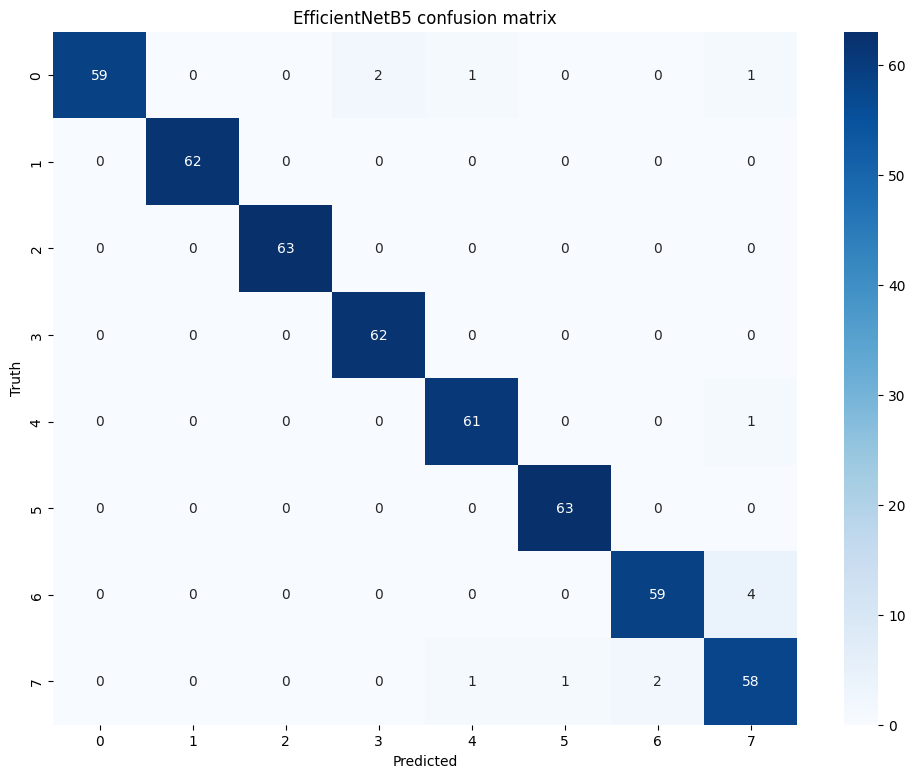

In [28]:
plt.figure(figsize = (12,9))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True,fmt='d',cmap= plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("EfficientNetB5 confusion matrix")
plt.show()

# 2nd Model: ResNet50

In [29]:
base_model_2 = tf.keras.applications.ResNet50(weights = "imagenet",include_top = False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [30]:
base_model_2.trainable = False

resnet_model = Sequential([
    Input(shape = (224,224,3)),
    base_model_2,
    GlobalAveragePooling2D(),
    Dense(256,activation = "relu",kernel_regularizer= regularizers.l2(0.016) ),
    Dropout(0.2),
    Dense(8,activation = "softmax")
])

resnet_model.compile(optimizer= Adamax(learning_rate = 0.001), loss ="categorical_crossentropy", metrics = ["accuracy"])

resnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,114,312 (91.99 MB)

 Trainable params: 526,600 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [31]:
check_point = ModelCheckpoint('resnet_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping =EarlyStopping(monitor='val_accuracy',patience=5, restore_best_weights=True, mode='max')

## Training and evaluating resnet50 model

In [32]:
history = resnet_model.fit(train_data,validation_data = val_data, epochs = epochs, callbacks = [early_stopping,check_point])

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7868 - loss: 6.5888

W0000 00:00:1721821019.932459      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


94/94 ━━━━━━━━━━━━━━━━━━━━ 37s 245ms/step - accuracy: 0.7880 - loss: 6.5753 - val_accuracy: 0.9660 - val_loss: 3.6918
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9830 - loss: 3.2863 - val_accuracy: 0.9900 - val_loss: 2.3694
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9927 - loss: 2.1670 - val_accuracy: 0.9900 - val_loss: 1.6453
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.9953 - loss: 1.5210 - val_accuracy: 0.9920 - val_loss: 1.1885
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9946 - loss: 1.1060 - val_accuracy: 0.9920 - val_loss: 0.8782
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9979 - loss: 0.8153 - val_accuracy: 0.9920 - val_loss: 0.6593
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9989 - loss: 0.6147 - val_accuracy: 0.9920 - val_loss: 0.5093
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9981 - loss: 0.4762 - val_accuracy: 0.9880 - val_loss

In [33]:
resnet_model.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9857 - loss: 0.3394


[0.3344069719314575, 0.9860000014305115]

In [34]:
vals = pd.DataFrame(history.history)
vals = vals.rename(columns={"loss":"Train Loss","val_loss":"Validation Loss","accuracy":"Train Accuracy","val_accuracy":"Validation Accuracy"})

In [35]:
iplot(px.line(data_frame=vals,
              y = ["Train Loss","Validation Loss"],
              labels={"index":"epochs","value":"loss"},
              title = "Losses",
              template="plotly_dark"))

In [36]:
iplot(px.line(data_frame=vals,
              y = ["Train Accuracy","Validation Accuracy"],
              labels={"index":"epochs","value":"accuracy"},
              title = "Accuracy",
              template="plotly_dark"))

In [37]:
predictions = resnet_model.predict(test_data) 
y_pred = np.argmax(predictions, axis = 1)
y_true = test_data.classes

16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 319ms/step


In [38]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        62
           4       0.94      0.97      0.95        62
           5       1.00      0.97      0.98        63
           6       0.98      1.00      0.99        63
           7       1.00      0.97      0.98        62

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



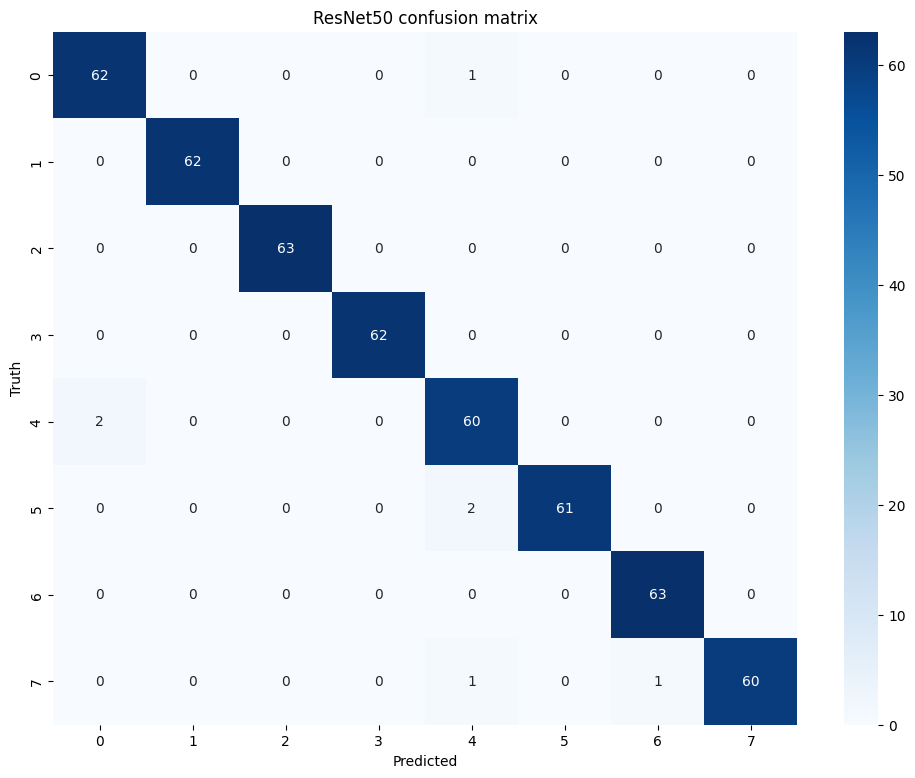

In [39]:
plt.figure(figsize = (12,9))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True,fmt='d',cmap= plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("ResNet50 confusion matrix")
plt.show()

# 3rd Model: MobileNetV2

In [40]:
base_model_3 = tf.keras.applications.MobileNetV2(weights = "imagenet", include_top = False, pooling = "max")

/tmp/ipykernel_24/311636714.py:1: UserWarning:

`input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [41]:
base_model_3.trainable = False

mobilenet_model = Sequential([
    Input(shape=(224,224,3)),
    base_model_3,
    Dropout(0.4),
    Dense(128,activation = "relu",kernel_regularizer = regularizers.l2(0.0016)),
    Dense(128,activation = "relu",kernel_regularizer = regularizers.l2(0.0016)),
    Dropout(0.4),
    Dense(8,activation = "softmax")
    
])

mobilenet_model.compile(optimizer = Adamax(learning_rate = 0.001),loss = "categorical_crossentropy", metrics= ["accuracy"])

mobilenet_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,439,496 (9.31 MB)

 Trainable params: 181,512 (709.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [42]:
check_point = ModelCheckpoint('mobilenet_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

## Training and evaluating MobileNetV2 model

In [43]:
history = mobilenet_model.fit(train_data,validation_data = val_data, epochs = 35, callbacks = [check_point])

Epoch 1/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 282ms/step - accuracy: 0.2301 - loss: 3.4665 - val_accuracy: 0.5600 - val_loss: 1.7648
Epoch 2/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.4283 - loss: 2.0952 - val_accuracy: 0.7480 - val_loss: 1.4339
Epoch 3/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.5263 - loss: 1.7994 - val_accuracy: 0.7440 - val_loss: 1.2652
Epoch 4/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 177ms/step - accuracy: 0.6189 - loss: 1.5749 - val_accuracy: 0.7680 - val_loss: 1.1669
Epoch 5/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.6562 - loss: 1.4677 - val_accuracy: 0.7920 - val_loss: 1.1073
Epoch 6/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.6709 - loss: 1.4213 - val_accuracy: 0.8080 - val_loss: 1.0451
Epoch 7/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.6954 - loss: 1.3427 - val_accuracy: 0.8320 - val_loss: 0.9991
Epoch 8/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 179ms/step - accuracy: 0.7346 - loss: 1.2518 - val_accuracy: 0.84

In [44]:
 mobilenet_model.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9334 - loss: 0.4690


[0.4996529519557953, 0.9259999990463257]

In [45]:
vals = pd.DataFrame(history.history)
vals = vals.rename(columns={"loss":"Train Loss","val_loss":"Validation Loss","accuracy":"Train Accuracy","val_accuracy":"Validation Accuracy"})

In [46]:
iplot(px.line(data_frame=vals,
              y = ["Train Loss","Validation Loss"],
              labels={"index":"epochs","value":"loss"},
              title = "Losses",
              template="plotly_dark"))

In [47]:
iplot(px.line(data_frame=vals,
              y = ["Train Accuracy","Validation Accuracy"],
              labels={"index":"epochs","value":"accuracy"},
              title = "Accuracy",
              template="plotly_dark"))

In [48]:
predictions = mobilenet_model.predict(test_data) 
y_pred = np.argmax(predictions, axis = 1)
y_true = test_data.classes

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step


In [49]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        63
           1       0.94      0.98      0.96        62
           2       1.00      1.00      1.00        63
           3       0.91      0.97      0.94        62
           4       0.81      0.87      0.84        62
           5       1.00      0.98      0.99        63
           6       0.89      0.89      0.89        63
           7       0.98      0.84      0.90        62

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



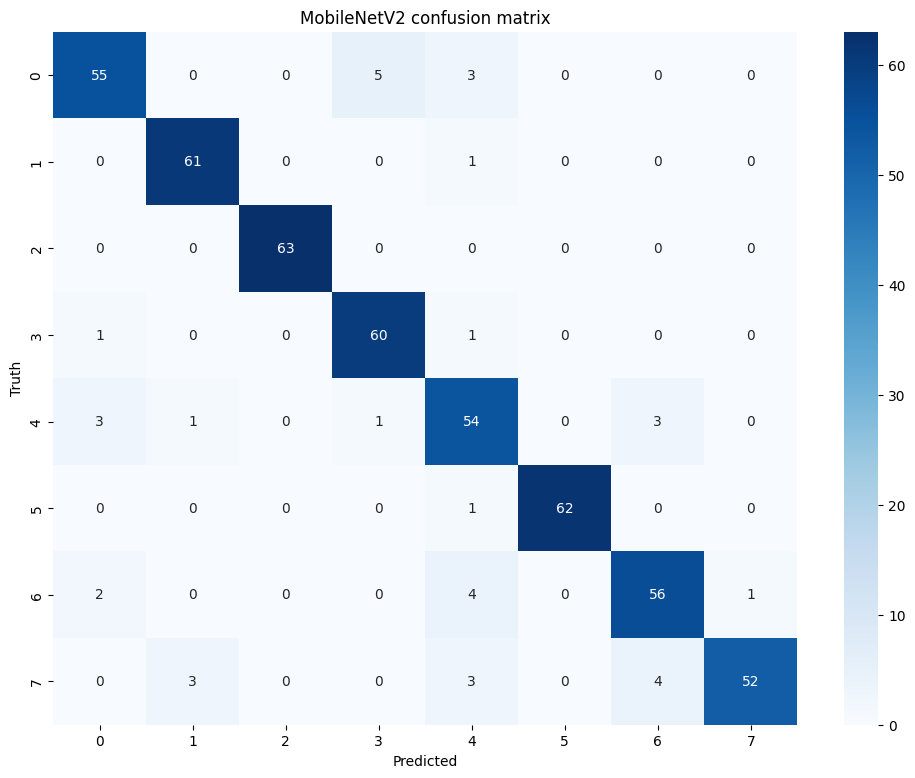

In [50]:
plt.figure(figsize = (12,9))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True,fmt='d',cmap= plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("MobileNetV2 confusion matrix")
plt.show()